# Project: Heart Diseases Prediction Model

__Cardiovascular diseases__ are the leading cause of death globally, resulted in 17.9 million deaths (32.1%) in 2015, up from 12.3 million (25.8%) in 1990. It is estimated that 90% of CVD is preventable. There are many risk factors for heart diseases that we will take a closer look at.

The main objective of this study is to build a model that can predict the heart disease occurrence, based on a combination of features (risk factors) describing the disease. Different machine learning classification techniques will be implemented and compared upon standard performance metric such as accuracy.

The dataset used for this study was taken from UCI machine learning repository, titled “Heart Disease Data Set”.

Contents of the Notebook:

1. Dataset structure & description

1. Explore the data

1. Data preparation

1. Modelling and predicting with machine learning

In [12]:
# data analysis, splitting and wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## 1. Dataset structure & description

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Attribute Information:

- age - age in years
- sex - sex(1 = male; 0 = female)
- chest_pain - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- blood_pressure - resting blood pressure (in mm Hg on admission to the hospital)
- serum_cholestoral - serum cholestoral in mg/dl
- fasting_blood_sugar - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- electrocardiographic - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
- max_heart_rate - maximum heart rate achieved
- induced_angina - exercise induced angina (1 = yes; 0 = no)
- ST_depression - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
- no_of_vessels - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- diagnosis - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

In [13]:
# column names in accordance with feature information
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

# read the file
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names=col_names, header=None, na_values="?")

print("Number of records: {}\nNumber of variables: {}".format(df.shape[0], df.shape[1]))

# display the first 5 lines
df.head()

Number of records: 303
Number of variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2. Explore the data

### Target value

In [14]:
# count values of explained variable
df.diagnosis.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: diagnosis, dtype: int64

In [15]:
# create a boolean vector and map it with corresponding values (True=1, False=0)
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

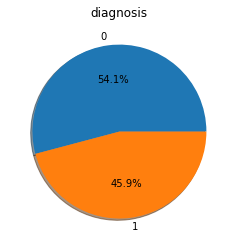

In [16]:
# create plot
f, ax = plt.subplots()
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('diagnosis')
ax.set_ylabel('')
plt.show()

### Numeric features

In [17]:
# view of descriptive statistics
df[['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.693069,149.607261,54.438944,131.689769,1.039604
std,51.776918,22.875003,9.038662,17.599748,1.161075
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,48.000000,120.000000,0.000000
50%,241.000000,153.000000,56.000000,130.000000,0.800000
75%,275.000000,166.000000,61.000000,140.000000,1.600000
max,564.000000,202.000000,77.000000,200.000000,6.200000


### Categorical features

In [18]:
# count ill vs healthy people grouped by sex
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

## 3. Data Preparation

In order to make our dataset compatible with machine learning algorithms contained in scikit-learn library, first of all, we need to handle all missing data.

In [19]:
# show columns having missing values
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

In [20]:
# fill missing values with mode
df['no_of_vessels'].fillna(df['no_of_vessels'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [45]:
# extract the target variable
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(303, 13)
(303,)
train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


## 4. Modelling and predicting with Machine Learning

In [46]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

### Logistic Regression

Logistic regression is a basic technique in statistical analysis that attempts to predict a data value based on prior observations. A logistic regression algorithm looks at the relationship between a dependent variable and one or more dependent variables.

In [47]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 85.85%
Test accuracy: 85.71%


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Support Vector Machines

In [48]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 92.92%
Test accuracy: 82.42%


In [66]:
# tuned SVM
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.1, gamma = 0.15, kernel='rbf')

Train accuracy: 86.32%
Test accuracy: 83.52%


### Random Forests

Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Train accuracy: 98.58%
Test accuracy: 82.42%


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


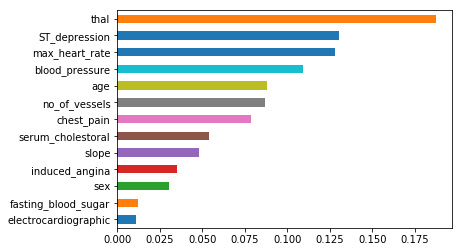

In [68]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=4)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()